<a href="https://colab.research.google.com/github/bkullukcu/Medical-Cost-Analysis/blob/master/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Dataset

In [ ]:
train = pd.read_csv('insurance.csv')

In [ ]:
train_s = pd.read_csv('insurance.csv')

In [ ]:
train_s.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
train_s.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
train_s.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Converting Categorical Features

In [ ]:
sex = pd.get_dummies(train['sex'],drop_first=True)
smoker = pd.get_dummies(train['smoker'],drop_first=True)
region = pd.get_dummies(train['region'])

In [ ]:
train.drop(['sex','smoker','region'],axis=1,inplace=True)

In [ ]:
train = pd.concat([train,sex,smoker,region],axis=1)

In [ ]:
train.rename(columns = {'yes':'smoker'}, inplace = True)

In [ ]:
train.head()

,age,bmi,children,charges,male,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data

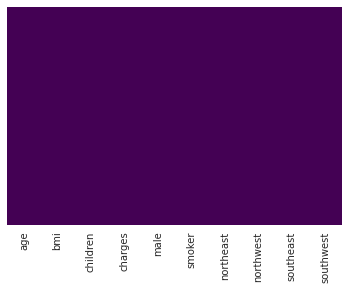

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data Visualisation


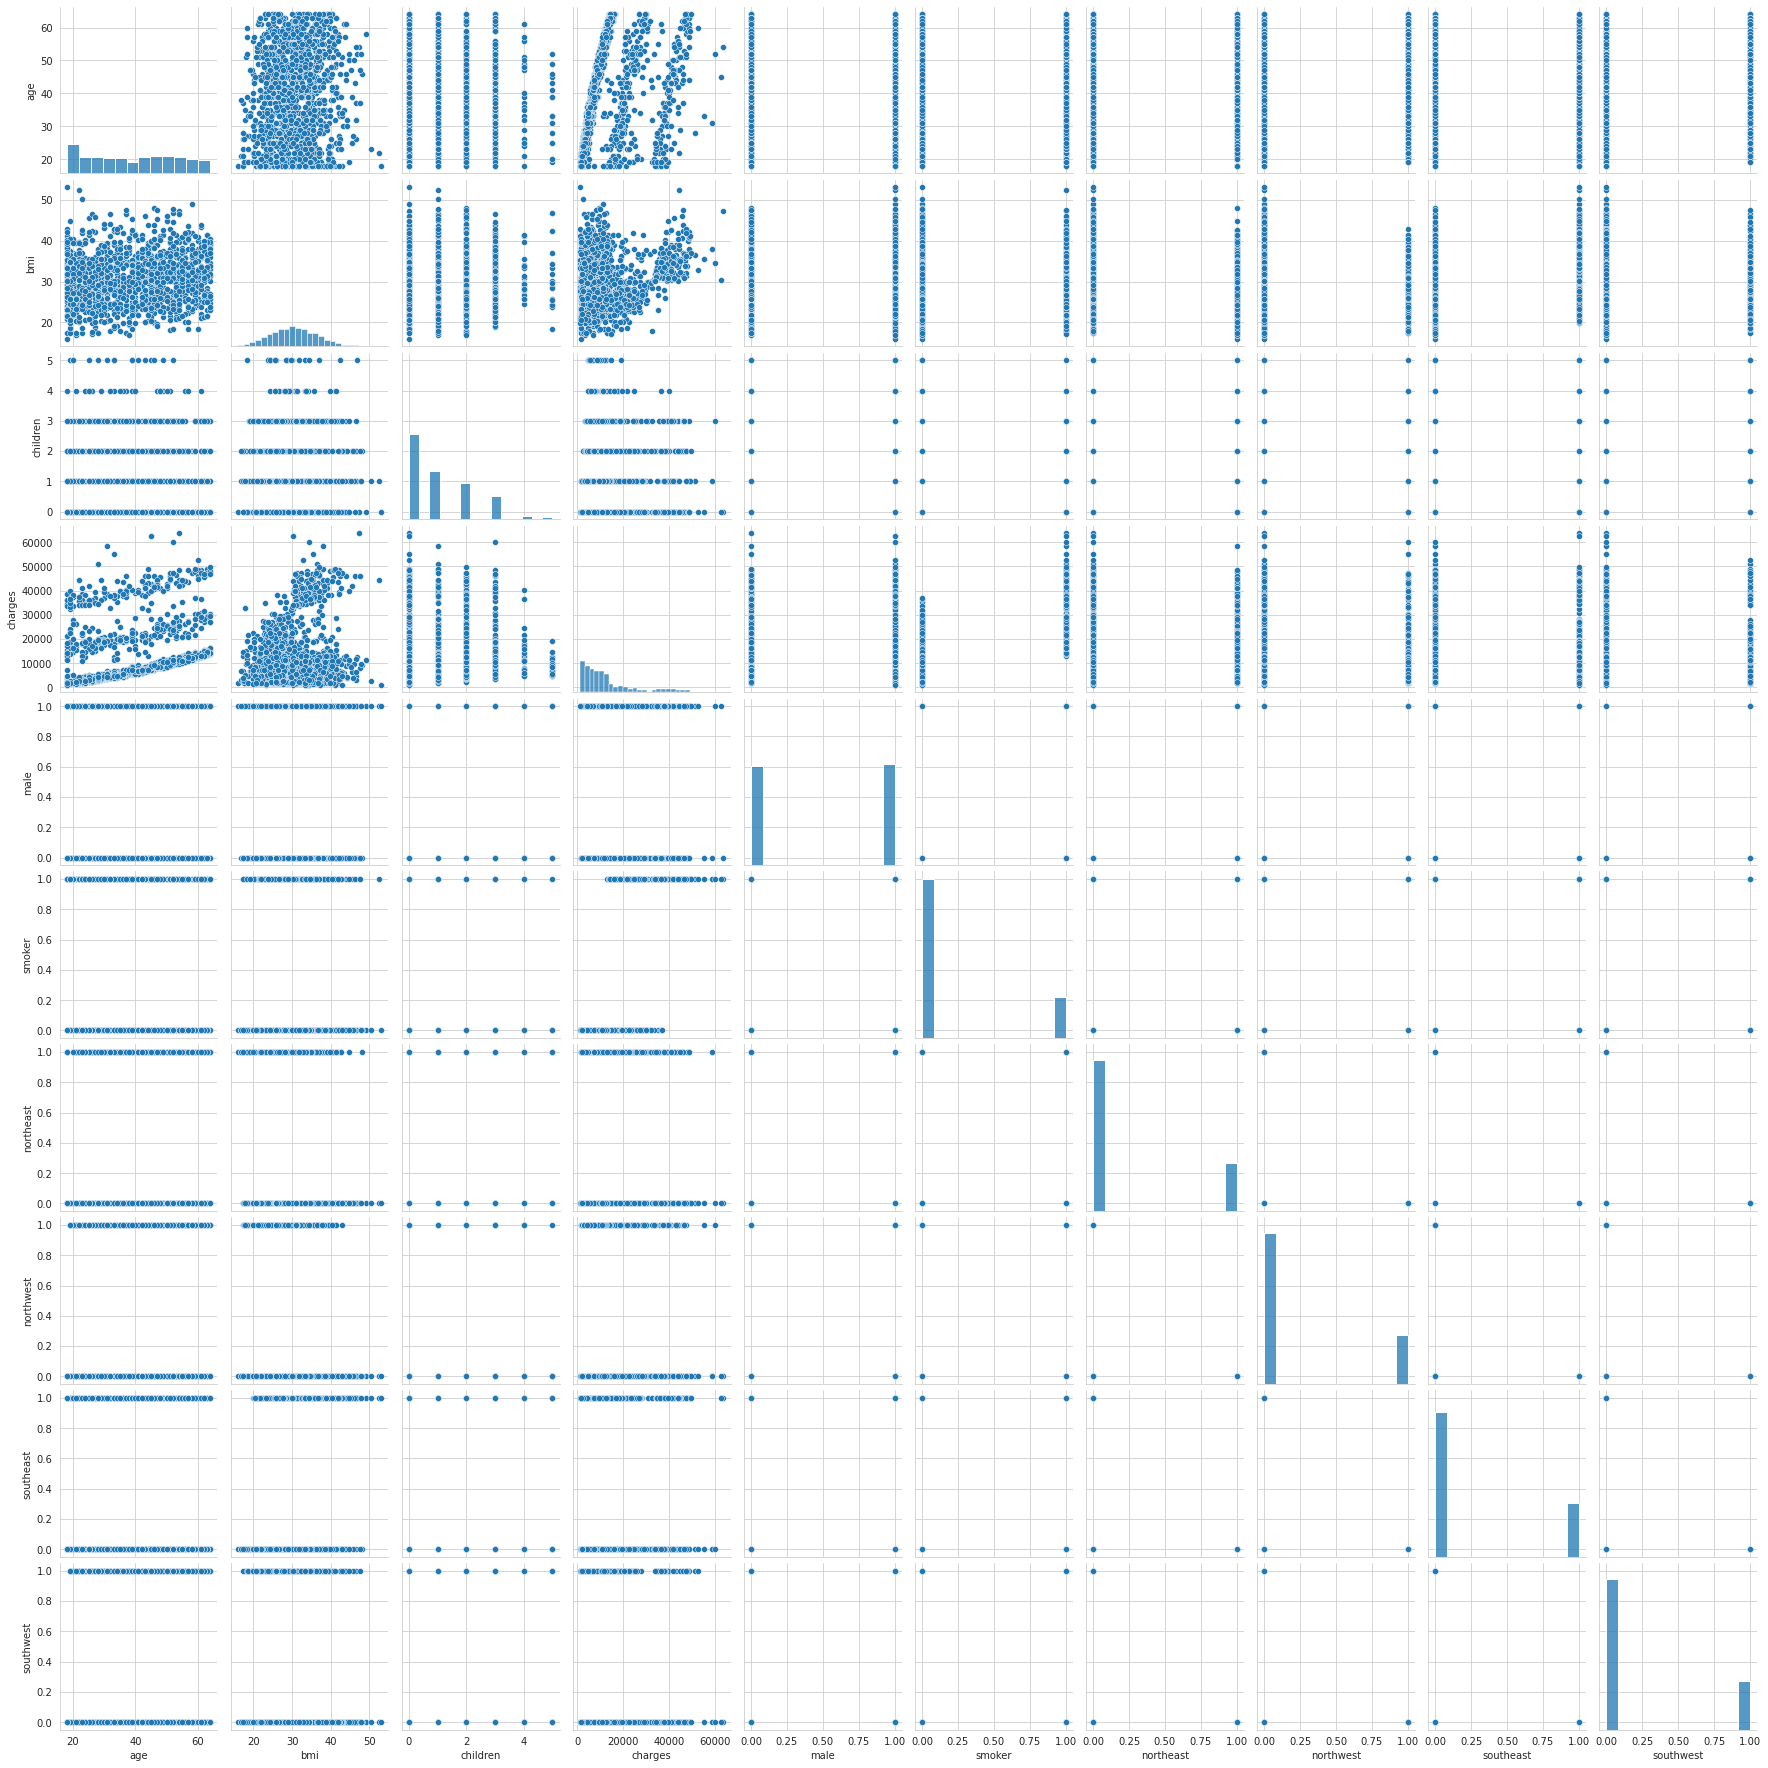

In [ ]:
sns.pairplot(train,palette='bwr')

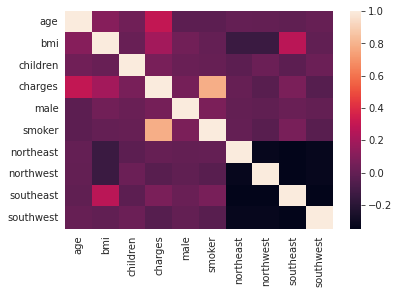

In [ ]:
sns.heatmap(train.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


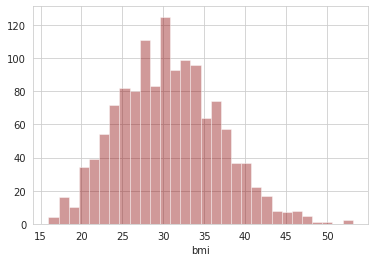

In [ ]:
sns.set_style('whitegrid')
sns.distplot(train['bmi'],kde=False,color='darkred',bins=30)

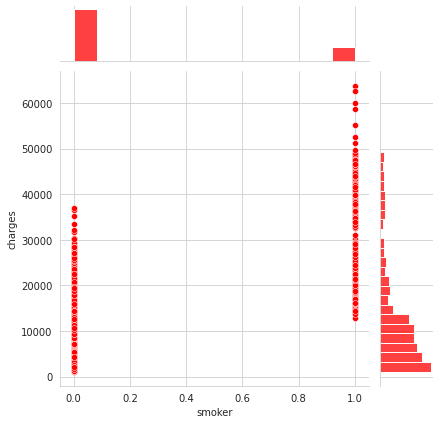

In [ ]:
sns.jointplot(x='smoker',y='charges',data=train,color='red')

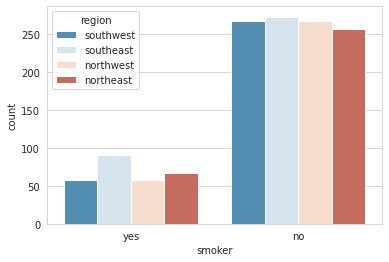

In [ ]:
sns.countplot(x='smoker',hue='region',data=train_s,palette='RdBu_r')

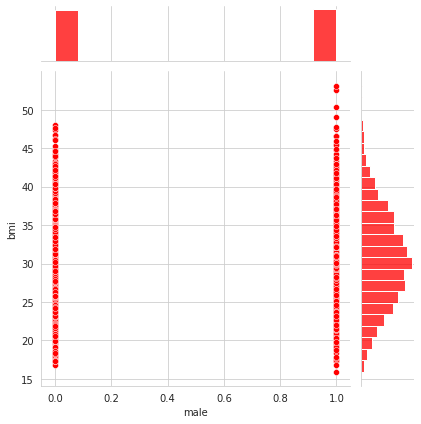

In [ ]:
sns.jointplot(x='male',y='bmi',data=train,color='red')

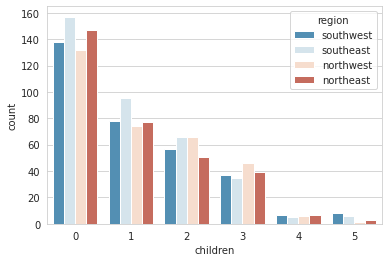

In [ ]:
sns.countplot(x='children',hue='region',data=train_s,palette='RdBu_r')

## People from Southeast have the most number of children in total

In [ ]:
train.groupby('children')[['southwest']].sum().southwest.sum()

325

In [ ]:
train.groupby('children')[['southeast']].sum().southeast.sum()

364

In [ ]:
train.groupby('children')[['northwest']].sum().northwest.sum()

325

In [ ]:
train.groupby('children')[['northeast']].sum().northeast.sum()

324

## Data Visualisation Continued

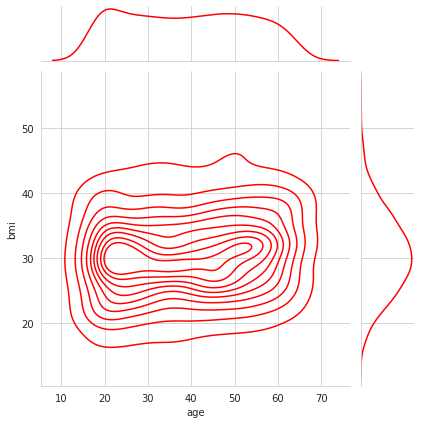

In [ ]:
sns.jointplot(x='age',y='bmi',data=train,color='red',kind='kde');

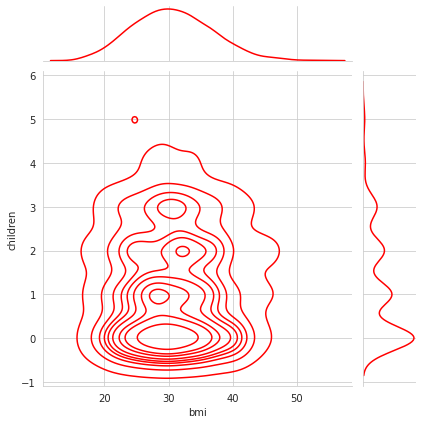

In [ ]:
sns.jointplot(x='bmi',y='children',data=train,color='red',kind='kde');

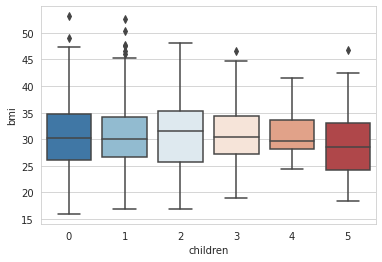

In [ ]:
sns.boxplot(x='children',y="bmi",data=train_s,palette='RdBu_r')

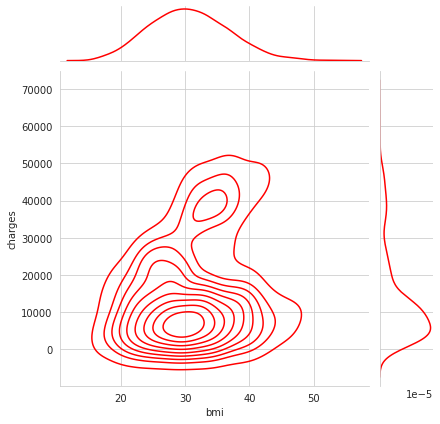

In [ ]:
sns.jointplot(x='bmi',y='charges',data=train,color='red',kind='kde')

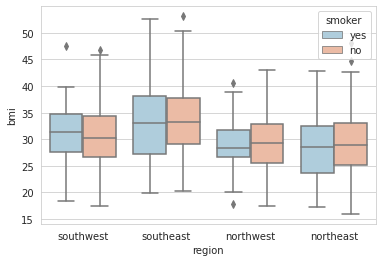

In [ ]:
sns.boxplot(x='region',y="bmi",hue='smoker',data=train_s,palette='RdBu_r')

## Training a Linear Regression Model
### X and y arrays

In [ ]:
Xv = train[['age', 'male',	'northwest',	'southeast','southwest','northwest','bmi', 'children', 'smoker']].values
X = train[['age', 'male',	'northwest',	'southeast','southwest','northwest','bmi', 'children', 'smoker']]
y = train['charges'].values

## k-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = Xv[train_index], Xv[test_index]

TRAIN: [ 268  269  270 ... 1335 1336 1337] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

## Grid Search / Hyperparameter Optimization

In [ ]:
# grid search linear regression model on the auto insurance dataset

from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(Xv, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4205.112354005205
Best Hyperparameters: {'alpha': 1e-05, 'fit_intercept': True, 'normalize': False, 'solver': 'lsqr'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


## Creating and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  259.41150849  -243.12194931  -235.4706811  -1100.08060478
 -1245.63246311  -235.4706811    339.92112302   438.81948798
 23682.50246755]


## Predicting Test Data

In [ ]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

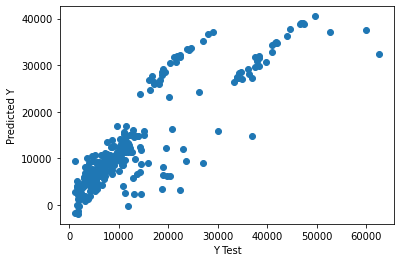

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model


In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4216.311839325833
MSE: 37125506.88990837
RMSE: 6093.070399224711


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


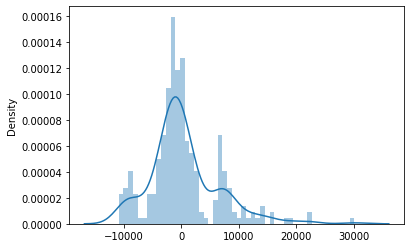

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
X

,age,male,northwest,southeast,southwest,northwest,bmi,children,smoker
0,19,0,0,0,1,0,27.900,0,1
1,18,1,0,1,0,0,33.770,1,0
2,28,1,0,1,0,0,33.000,3,0
3,33,1,1,0,0,1,22.705,0,0
4,32,1,1,0,0,1,28.880,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,1,0,0,1,30.970,3,0
1334,18,0,0,0,0,0,31.920,0,0
1335,18,0,0,1,0,0,36.850,0,0
1336,21,0,0,0,1,0,25.800,0,0


## Conclusion

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,259.411508
male,-243.121949
northwest,-235.470681
southeast,-1100.080605
southwest,-1245.632463
northwest,-235.470681
bmi,339.921123
children,438.819488
smoker,23682.502468


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Age** is associated with an **increase of 259.41 dollars charge**.
- Holding all other features fixed, being a **male** is associated with an **decrease of 243.12 dollars charge**.
- Holding all other features fixed, a 1 unit increase in **BMI** is associated with an **increase of 339.92 dollars charge**.
- Holding all other features fixed, a single increase in **children quantity** is associated with an **increase of 438.82 dollars charge**.
- Holding all other features fixed, being a **smoker** is associated with an **increase of 23682.50 dollars charge**.